## A Brief Overview of the Data
1.   Number of Videos: 9
2.   Uploaded By: Boston Police Department
3.   Files Type: mp4
4.   Videos Recorded on: 05/31/2020
5.   Type of Videos: Protests and Riots

Data Folder Used: https://drive.google.com/drive/folders/1be9oAwWtlNfjxOHNFuWhvgGYdruAjzu3?usp=sharing

# Importing the Data and the Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pysrt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13443 sha256=b2ed202fc6ae3b48e00b3de326fdc77de4fae2c0a9d7710bc0cfa144585685a8
  Stored in directory: /root/.cache/pip/wheels/30/7f/e8/55de9a9b07302d9e7fe47c27910e3bea0c48536153e74bd7e6
Successfully built pysrt


In [3]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 23.7 MB/s eta 0:00:00


In [4]:
import os
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from moviepy.editor import VideoFileClip
import pysrt
from wordcloud import WordCloud, STOPWORDS
from transformers import pipeline

# EDA

## Video Sizes

In [5]:
def get_file_sizes(directory):
  file_sizes = []
  for filename in os.listdir(directory):
    if filename.endswith(('.mp4')):
      filepath = os.path.join(directory, filename)
      size_in_bytes = os.path.getsize(filepath)
      size_in_gb = size_in_bytes / (1024**3)
      file_sizes.append(size_in_gb)
  return file_sizes

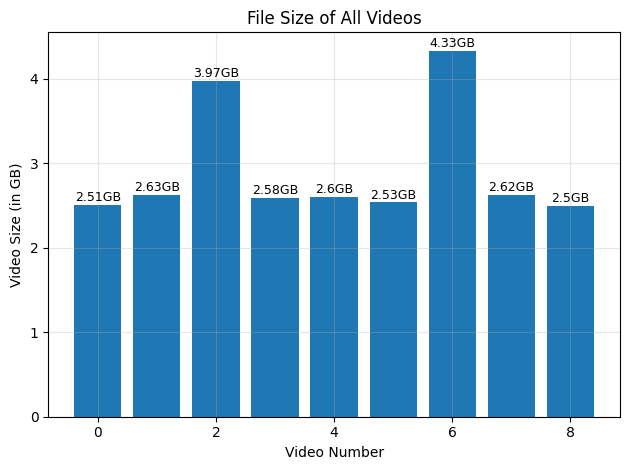

In [6]:
directory = 'drive/My Drive/Spark Project/Data/'
file_sizes = get_file_sizes(directory)

bars = plt.bar(range(len(file_sizes)), file_sizes)

plt.ylabel('Video Size (in GB)')
plt.xlabel('Video Number')
plt.title('File Size of All Videos')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, str(round(yval, 2)) + "GB", ha = 'center', va = 'bottom', fontsize = 9)

plt.grid(axis = 'x', linestyle = '-', alpha = 0.3)
plt.grid(axis = 'y', linestyle = '-', alpha = 0.3)
plt.tight_layout()
plt.show()

## Video Durations

In [7]:
def get_video_durations(directory):
  video_durations = []
  for filename in os.listdir(directory):
    if filename.endswith('.mp4'):
      video_path = os.path.join(directory, filename)
      clip = VideoFileClip(video_path)
      video_durations.append(clip.duration)
      clip.reader.close()
  return video_durations

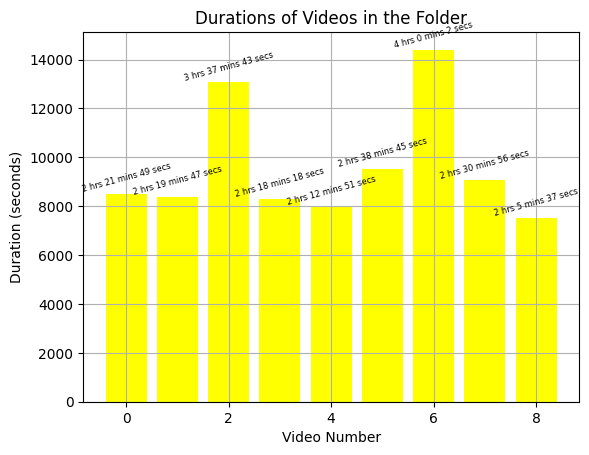

In [8]:
directory = 'drive/My Drive/Spark Project/Data/'
video_durations = get_video_durations(directory)

bars = plt.bar(range(len(video_durations)), video_durations, color = "yellow")

plt.ylabel('Duration (seconds)')
plt.xlabel('Video Number')
plt.title('Durations of Videos in the Folder')

for bar in bars:
    yval = bar.get_height()
    mins = yval//60
    secs = yval%60
    hrs = mins//60
    mins = mins%60
    tot = str(int(hrs)) + " hrs " + str(int(mins)) + " mins " + str(int(round(secs, 2))) + " secs"
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, tot, ha = 'center', va = 'bottom', fontsize = 6,  rotation = 15)

plt.grid(axis = 'x', linestyle = '-', alpha = 1.0)
plt.grid(axis = 'y', linestyle = '-', alpha = 1.0)
plt.show()

## Video Transcript Analysis

### Word Clouds

In [9]:
def filter_lines(lines):
  lines_ = []
  for i in range(len(lines)):
    sentence = lines[i]
    sentence = re.sub(r'\[[^\]]+\]\s*', '', sentence)
    if len(sentence) > 1:
      lines_.append(sentence)
  return lines_

In [10]:
def plot_wc(lines, title):
  text = ' '.join(lines)
  stopwords = set(STOPWORDS)
  wc = WordCloud(stopwords = stopwords, background_color = "white", width = 800, height = 800, contour_width = 3, contour_color = 'steelblue')
  wc.generate(text)
  plt.figure(figsize = (8, 8))
  plt.imshow(wc, interpolation = "bilinear")
  plt.axis("off")
  plt.title(title, fontsize = 16)
  plt.show()

In [11]:
lines = []

scripts = ["AXON_Body_2_Video_2020-05-31_2055-002_large.srt", "protest-006.srt", "Civil_Unrest_Tremont_@_Winter-001.srt", "RIOT_-_1_Ring_Rd_BO-003.srt"]

path = "drive/My Drive/Spark Project/Data/"
for i in scripts:
  subs = pysrt.open(os.path.join(path, i))
  for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [12]:
lines = filter_lines(lines)

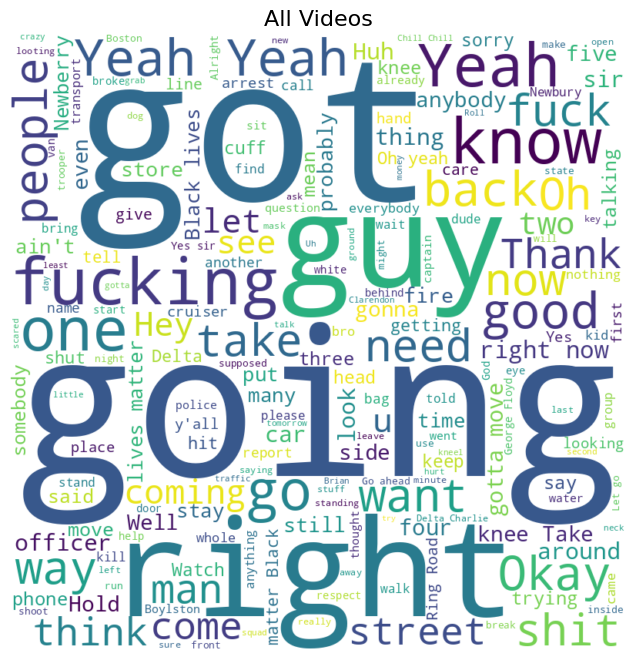

In [13]:
plot_wc(lines, "All Videos")

In [14]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/AXON_Body_2_Video_2020-05-31_2055-002_large.srt")
lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [15]:
lines = filter_lines(lines)

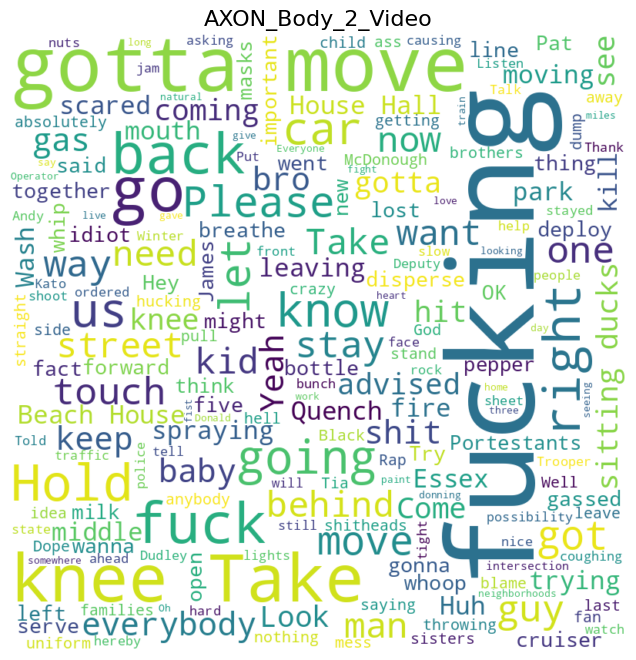

In [16]:
plot_wc(lines, "AXON_Body_2_Video")

In [17]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/protest-006.srt")
lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [18]:
lines = filter_lines(lines)

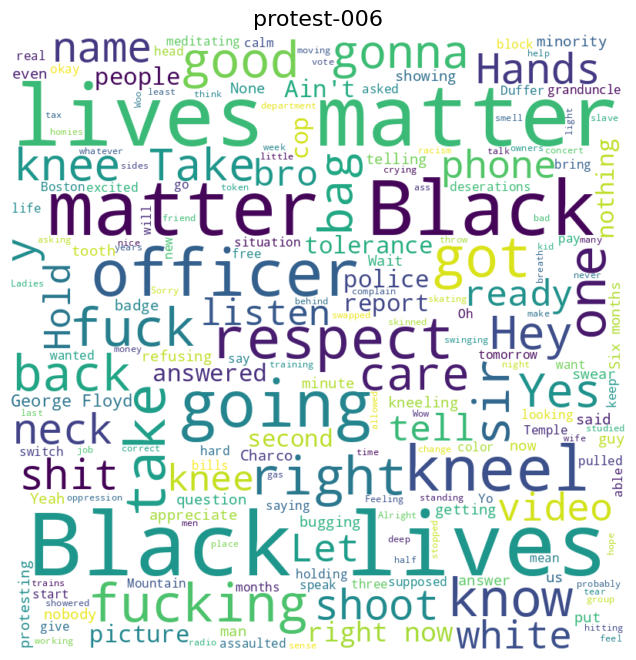

In [19]:
plot_wc(lines, "protest-006")

In [20]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/Civil_Unrest_Tremont_@_Winter-001.srt")
lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [21]:
lines = filter_lines(lines)

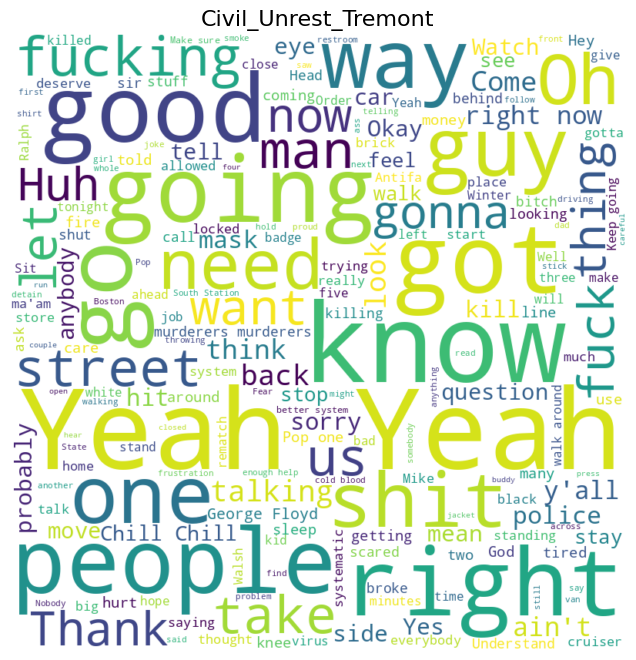

In [22]:
plot_wc(lines, "Civil_Unrest_Tremont")

In [23]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/RIOT_-_1_Ring_Rd_BO-003.srt")
lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [24]:
lines = filter_lines(lines)

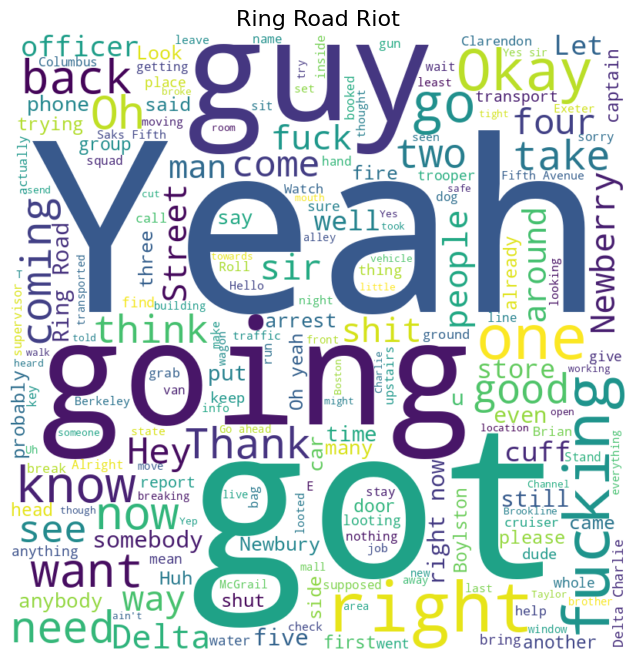

In [25]:
plot_wc(lines, "Ring Road Riot")

**Some Analysis on the Word Clouds**

- The word clouds suggest that there have been a lot of cuss words such as fuck, fucking, duffer, and shitheads being used in the videos.
- As these were protests mainly about racism, there were phrases such as Black Lives and Black Lives Matter. George Floyd's name has also been mentioned in some places.
- Some police terms such as arrest and cuff are also present.
- There are cerainly moments when officers talk about gassing the protestors or using pepper spray as these terms are present in the word clouds as well.
- Other words such as knee and kneel are also present in the word clouds which, in most cases, mean forceful arrests.
- Neighborhood names within Boston such as Newbury (Newberry) and Boylson are also present in good numbers.

### Emotion Analysis

**List of Emotions**:
  
  1. Neutral
  2. Curiosity
  3. Confusion
  4. Approval
  5. Annoyance
  6. Surprise
  7. Realization
  8. Excitement
  9. Optimism
  10. Amusement
  11. Admiration
  12. Anger
  13. Disapproval
  14. Love
  15. Disappointment
  16. Joy
  17. Caring
  18. Fear
  19. Desire
  20. Disgust
  21. Sadness
  22. Embarrassment
  23. Nervousness
  24. Gratitude
  25. Remorse
  26. Grief
  27. Relief
  28. Pride

Source: https://huggingface.co/datasets/go_emotions

In [26]:
classifier = pipeline(task="text-classification", model="SamLowe/roberta-base-go_emotions", top_k=None)

In [27]:
lines = []

scripts = ["AXON_Body_2_Video_2020-05-31_2055-002_large.srt", "protest-006.srt", "Civil_Unrest_Tremont_@_Winter-001.srt", "RIOT_-_1_Ring_Rd_BO-003.srt"]

path = "drive/My Drive/Spark Project/Data/"
for i in scripts:
  subs = pysrt.open(os.path.join(path, i))
  for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]

In [28]:
emotion_dict = {
    'neutral': 0, 'curiosity': 0, 'confusion': 0, 'approval': 0, 'annoyance': 0, 'surprise': 0, 'realization': 0, 'excitement': 0, 'optimism': 0, 'amusement': 0, 'admiration': 0, 'anger': 0, 'disapproval': 0,
    'love': 0, 'disappointment': 0, 'joy': 0, 'caring': 0, 'fear': 0, 'desire': 0, 'disgust': 0, 'sadness': 0, 'embarrassment': 0, 'nervousness': 0, 'gratitude': 0, 'remorse': 0, 'grief': 0, 'relief': 0, 'pride': 0
    }

In [29]:
for i in tqdm(lines):
  try:
    pred = classifier(i)
  except:
    continue
  for i in range(len(pred[0])):
    x = pred[0][i]
    emotion_dict[x['label']] += x['score']
emotion_dict = {key: value/len(lines) for key, value in emotion_dict.items()}

100%|██████████| 4474/4474 [08:57<00:00,  8.32it/s]


In [31]:
sum_ = sum(emotion_dict.values())
for i in emotion_dict.keys():
  emotion_dict[i] = emotion_dict[i]/sum_

In [33]:
emotion_dict_ = sorted(emotion_dict.items(), key=lambda item: item[1], reverse=True)[:10]
keys = [pair[0] for pair in emotion_dict_]
vals = [pair[1] for pair in emotion_dict_]
vals = [val*100 for val in vals]
sum_vals = sum(vals)

In [34]:
sum(vals)

92.0410431956884

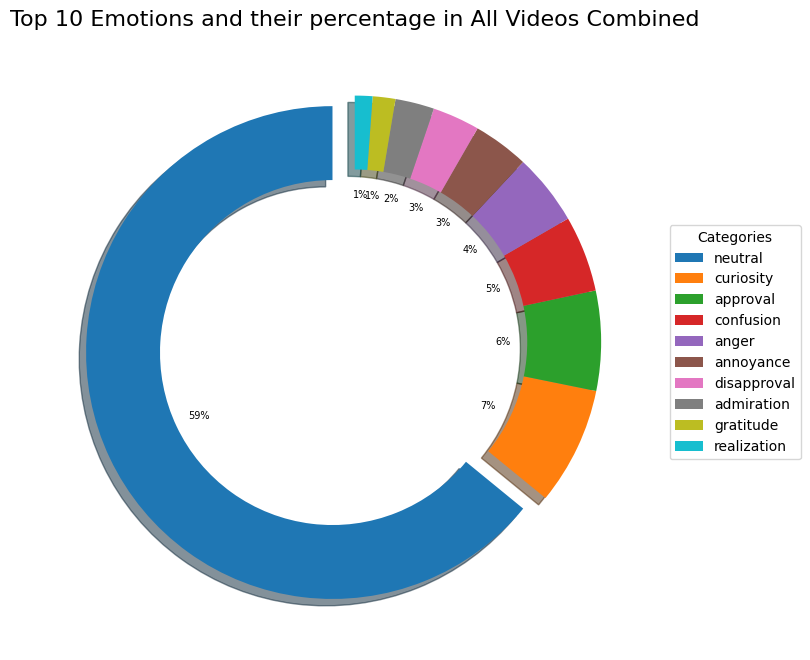

In [35]:
explode = [0.1 if val == max(vals) else 0 for val in vals]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(vals, autopct=lambda p: '{:,.0f}%'.format((p/100)*sum_vals), startangle = 90, explode = explode, shadow = True, wedgeprops = dict(width = 0.3)) #colors = plt.cm.Pastel2.colors, ,
plt.setp(autotexts, size = 7, color = "black")#weight = "bold",
plt.legend(wedges, keys, title = "Categories", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.title('Top 10 Emotions and their percentage in All Videos Combined', fontsize = 16)
plt.show()

In [36]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/AXON_Body_2_Video_2020-05-31_2055-002_large.srt")

lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]
lines = filter_lines(lines)

In [37]:
emotion_dict = {
    'neutral': 0, 'curiosity': 0, 'confusion': 0, 'approval': 0, 'annoyance': 0, 'surprise': 0, 'realization': 0, 'excitement': 0, 'optimism': 0, 'amusement': 0, 'admiration': 0, 'anger': 0, 'disapproval': 0,
    'love': 0, 'disappointment': 0, 'joy': 0, 'caring': 0, 'fear': 0, 'desire': 0, 'disgust': 0, 'sadness': 0, 'embarrassment': 0, 'nervousness': 0, 'gratitude': 0, 'remorse': 0, 'grief': 0, 'relief': 0, 'pride': 0
    }

In [38]:
for i in tqdm(lines):
  pred = classifier(i)
  for i in range(len(pred[0])):
    x = pred[0][i]
    emotion_dict[x['label']] += x['score']
emotion_dict = {key: value/len(lines) for key, value in emotion_dict.items()}

100%|██████████| 330/330 [00:39<00:00,  8.31it/s]


In [40]:
sum_ = sum(emotion_dict.values())
for i in emotion_dict.keys():
  emotion_dict[i] = emotion_dict[i]/sum_

In [42]:
emotion_dict_ = sorted(emotion_dict.items(), key=lambda item: item[1], reverse=True)[:10]
keys = [pair[0] for pair in emotion_dict_]
vals = [pair[1] for pair in emotion_dict_]
vals = [val*100 for val in vals]
sum_vals = sum(vals)

In [43]:
sum(vals)

94.3789377869984

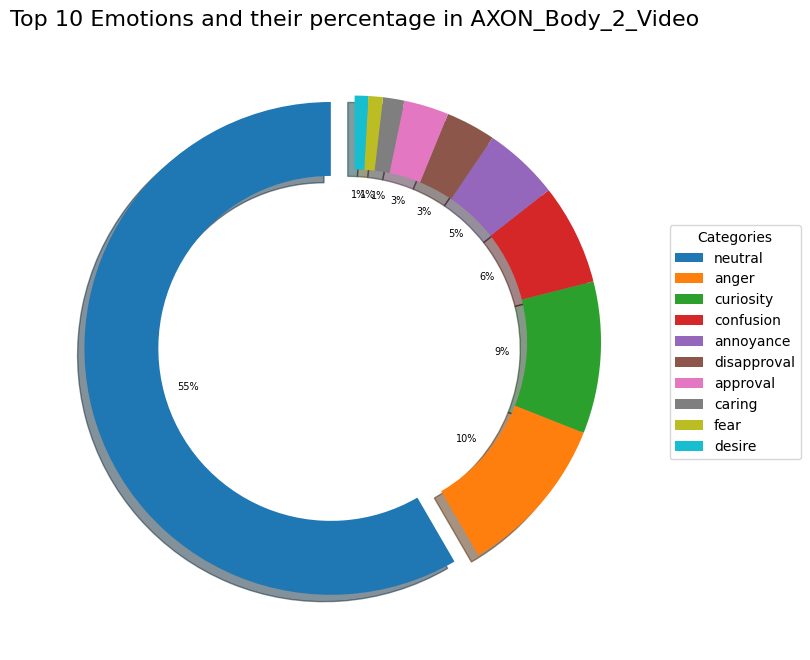

In [44]:
explode = [0.1 if val == max(vals) else 0 for val in vals]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(vals, autopct=lambda p: '{:,.0f}%'.format((p/100)*sum_vals), startangle = 90, explode = explode, shadow = True, wedgeprops = dict(width = 0.3)) #colors = plt.cm.Pastel2.colors, ,
plt.setp(autotexts, size = 7, color = "black")#weight = "bold",
plt.legend(wedges, keys, title = "Categories", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.title('Top 10 Emotions and their percentage in AXON_Body_2_Video', fontsize = 16)
plt.show()

In [45]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/protest-006.srt")

lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]
lines = filter_lines(lines)

In [46]:
emotion_dict = {
    'neutral': 0, 'curiosity': 0, 'confusion': 0, 'approval': 0, 'annoyance': 0, 'surprise': 0, 'realization': 0, 'excitement': 0, 'optimism': 0, 'amusement': 0, 'admiration': 0, 'anger': 0, 'disapproval': 0,
    'love': 0, 'disappointment': 0, 'joy': 0, 'caring': 0, 'fear': 0, 'desire': 0, 'disgust': 0, 'sadness': 0, 'embarrassment': 0, 'nervousness': 0, 'gratitude': 0, 'remorse': 0, 'grief': 0, 'relief': 0, 'pride': 0
    }

In [47]:
for i in tqdm(lines):
  pred = classifier(i)
  for i in range(len(pred[0])):
    x = pred[0][i]
    emotion_dict[x['label']] += x['score']
emotion_dict = {key: value/len(lines) for key, value in emotion_dict.items()}

100%|██████████| 321/321 [00:43<00:00,  7.45it/s]


In [49]:
sum_ = sum(emotion_dict.values())
for i in emotion_dict.keys():
  emotion_dict[i] = emotion_dict[i]/sum_

In [51]:
emotion_dict_ = sorted(emotion_dict.items(), key=lambda item: item[1], reverse=True)[:10]
keys = [pair[0] for pair in emotion_dict_]
vals = [pair[1] for pair in emotion_dict_]
vals = [val*100 for val in vals]
sum_vals = sum(vals)

In [52]:
sum(vals)

93.53838942285098

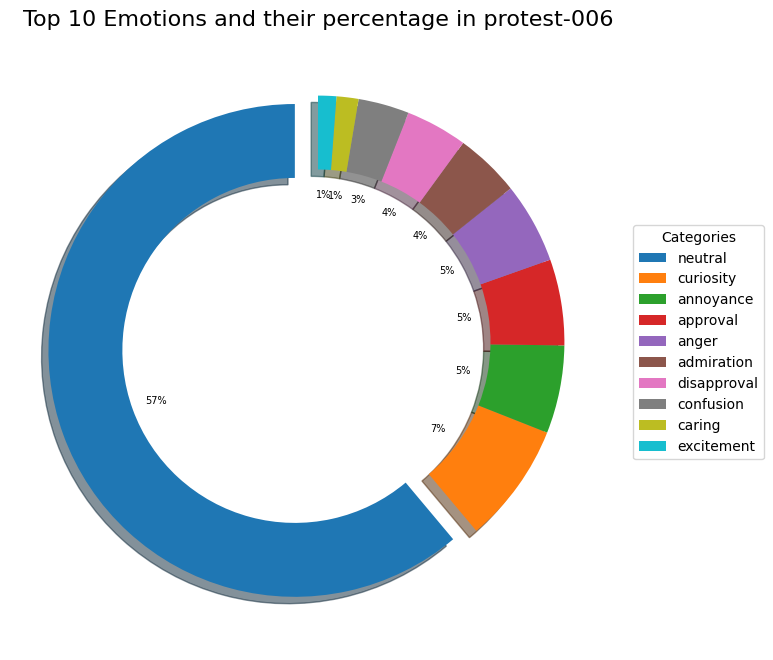

In [53]:
explode = [0.1 if val == max(vals) else 0 for val in vals]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(vals, autopct=lambda p: '{:,.0f}%'.format((p/100)*sum_vals), startangle = 90, explode = explode, shadow = True, wedgeprops = dict(width = 0.3)) #colors = plt.cm.Pastel2.colors, ,
plt.setp(autotexts, size = 7, color = "black")#weight = "bold",
plt.legend(wedges, keys, title = "Categories", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.title('Top 10 Emotions and their percentage in protest-006', fontsize = 16)
plt.show()

In [54]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/Civil_Unrest_Tremont_@_Winter-001.srt")

lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]
lines = filter_lines(lines)

In [55]:
emotion_dict = {
    'neutral': 0, 'curiosity': 0, 'confusion': 0, 'approval': 0, 'annoyance': 0, 'surprise': 0, 'realization': 0, 'excitement': 0, 'optimism': 0, 'amusement': 0, 'admiration': 0, 'anger': 0, 'disapproval': 0,
    'love': 0, 'disappointment': 0, 'joy': 0, 'caring': 0, 'fear': 0, 'desire': 0, 'disgust': 0, 'sadness': 0, 'embarrassment': 0, 'nervousness': 0, 'gratitude': 0, 'remorse': 0, 'grief': 0, 'relief': 0, 'pride': 0
    }

In [56]:
for i in tqdm(lines):
  try:
    pred = classifier(i)
  except:
    continue
  for i in range(len(pred[0])):
    x = pred[0][i]
    emotion_dict[x['label']] += x['score']
emotion_dict = {key: value/len(lines) for key, value in emotion_dict.items()}

100%|██████████| 1389/1389 [02:42<00:00,  8.56it/s]


In [58]:
sum_ = sum(emotion_dict.values())
for i in emotion_dict.keys():
  emotion_dict[i] = emotion_dict[i]/sum_

In [60]:
emotion_dict_ = sorted(emotion_dict.items(), key=lambda item: item[1], reverse=True)[:10]
keys = [pair[0] for pair in emotion_dict_]
vals = [pair[1] for pair in emotion_dict_]
vals = [val*100 for val in vals]
sum_vals = sum(vals)

In [61]:
sum(vals)

89.99371694358008

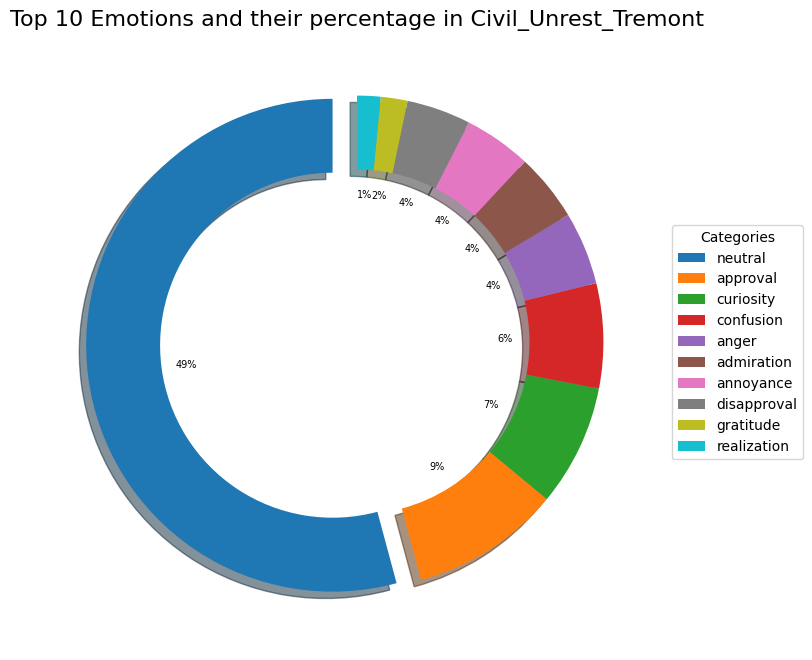

In [62]:
explode = [0.1 if val == max(vals) else 0 for val in vals]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(vals, autopct=lambda p: '{:,.0f}%'.format((p/100)*sum_vals), startangle = 90, explode = explode, shadow = True, wedgeprops = dict(width = 0.3)) #colors = plt.cm.Pastel2.colors, ,
plt.setp(autotexts, size = 7, color = "black")#weight = "bold",
plt.legend(wedges, keys, title = "Categories", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.title('Top 10 Emotions and their percentage in Civil_Unrest_Tremont', fontsize = 16)
plt.show()

In [63]:
subs = pysrt.open("drive/My Drive/Spark Project/Data/RIOT_-_1_Ring_Rd_BO-003.srt")

lines = []
for sub in subs:
    lines.append(sub.text)

lines = [line.split(": ", 1)[1] if ": " in line else line for line in lines]
lines = filter_lines(lines)

In [64]:
emotion_dict = {
    'neutral': 0, 'curiosity': 0, 'confusion': 0, 'approval': 0, 'annoyance': 0, 'surprise': 0, 'realization': 0, 'excitement': 0, 'optimism': 0, 'amusement': 0, 'admiration': 0, 'anger': 0, 'disapproval': 0,
    'love': 0, 'disappointment': 0, 'joy': 0, 'caring': 0, 'fear': 0, 'desire': 0, 'disgust': 0, 'sadness': 0, 'embarrassment': 0, 'nervousness': 0, 'gratitude': 0, 'remorse': 0, 'grief': 0, 'relief': 0, 'pride': 0
    }

In [65]:
for i in tqdm(lines):
  pred = classifier(i)
  for i in range(len(pred[0])):
    x = pred[0][i]
    emotion_dict[x['label']] += x['score']
emotion_dict = {key: value/len(lines) for key, value in emotion_dict.items()}

100%|██████████| 2311/2311 [04:40<00:00,  8.23it/s]


In [67]:
sum_ = sum(emotion_dict.values())
for i in emotion_dict.keys():
  emotion_dict[i] = emotion_dict[i]/sum_

In [69]:
emotion_dict_ = sorted(emotion_dict.items(), key=lambda item: item[1], reverse=True)[:10]
keys = [pair[0] for pair in emotion_dict_]
vals = [pair[1] for pair in emotion_dict_]
vals = [val*100 for val in vals]
sum_vals = sum(vals)

In [70]:
sum(vals)

92.99897852253517

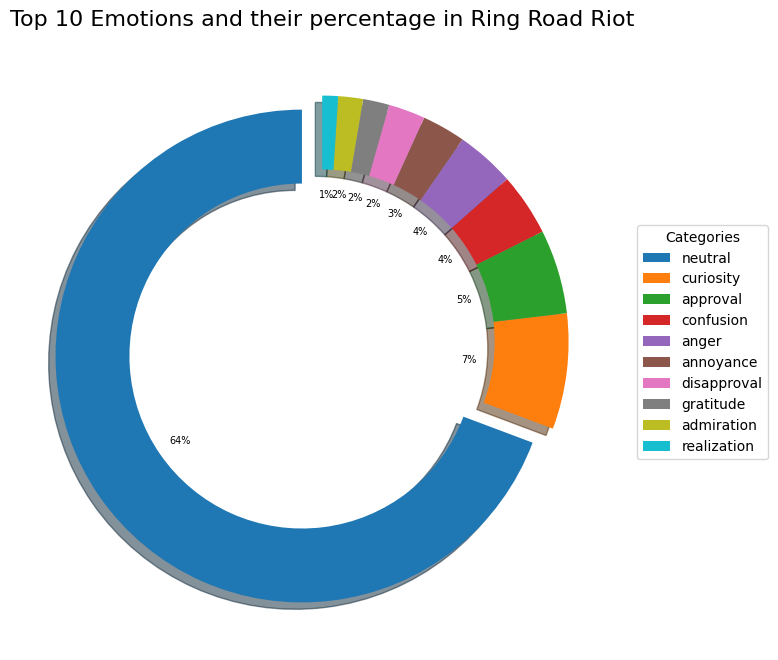

In [71]:
explode = [0.1 if val == max(vals) else 0 for val in vals]

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(vals, autopct=lambda p: '{:,.0f}%'.format((p/100)*sum_vals), startangle = 90, explode = explode, shadow = True, wedgeprops = dict(width = 0.3)) #colors = plt.cm.Pastel2.colors, ,
plt.setp(autotexts, size = 7, color = "black")#weight = "bold",
plt.legend(wedges, keys, title = "Categories", loc = "center left", bbox_to_anchor = (1, 0, 0.5, 1))

plt.title('Top 10 Emotions and their percentage in Ring Road Riot', fontsize = 16)
plt.show()

**Some Analysis on the Transcript's Emotions**

- All transcripts, including the combined transcript, have a majority of neutral emotion which is understandable.
- Suprisingly, curiosity is the second most occuring emotion across transcripts. This might be due to the questions asked by the protestors while protesting as well as to the police (like asking for directions).
- We see confusion occuring in the Top 5 emotions of most transcripts which showcases the chaos occuring in the videos.
- Annoyance is another emotion that occurs regularly among the top 10 emotions, something that comes a lot from both the protestors and the police.